# I- Problème

Considérant un système dynamique défini par sa focntion de transfert en boucle ouverte suivante: 
$$ \mathbf{G(s)} = \frac{1}{s(s+2)}  $$ 

La réponse en boucle fermée du notre système, ne doit pas dépasser le $16\%$ de la valeur finale. Le temps de réponse à $5\%$ ne doit pas dépasser le $0.3$ secondes, tout en garantissant une erreur statique nulle pour une excitation en échelon.

# II- Synthèse du correcteur et méthodologie

D'abord, on note que le système est instable en boucle ouvert puisque, il comporte un intégrateur. D'où, la nécessité de synthétiser un correcteur pour garantir la stabilité du système en boucle fermée.
Toutefois, pour un problème de poursuite d'une consigne en échelon on n'as pas besoin de synthétiser un correcteur avec une action intégrale. On va essayer de synthétiser un correcteur comportant uniquement une action proportionnel $C(s)=K, K \gt 0$.

On commence par traduire le cahier de charge en une focntion de transfert de seconde ordre traduisant le comportement souhaité du système en boucle fermée.

## II-1 Fonction du transfert souhaitée en boucle fermée.

### II-1-1 Calcul de la Fonction de transfert de réference

La fonction de transfert en boucle fermée, est alors choisie du 2éme ordre, en espérant que ses deux poles (conjuguées) seront les poles dominants. Cette fonction de transfert peut s'écrire sous cette forme:
$$\mathbf{{F_{ref}}(s)} = \frac{w_{n}^{2}}{s^2+2 \zeta w_n + w_{n}^{2}} $$
avec:
-  $\zeta$ est le coeficient d'amortissemnt. Généralemnt, $0 \lt \zeta \lt 1$ pour garantir que la réponse du système en boucle fermée est pseudo-oscillante ou oscillante-amortie.
- $w_n \gt 0$  est la pulsation naturelle du système. 

Dans ce cas le pair des poles conjuguées est donnée par:
$$ s_{1,2} = -\zeta w_n \pm j w_n \sqrt{1-\zeta^2}$$

Il est claire d'aprés la forme générale ( indépendament des valeurs de $\zeta$ et $w_n$) de notre fonction du transfert en boucle fermée que le gain statique vaut exactement $1$, c'ad $\mathbf{F(0)} = \frac{w_{n}^{2}}{ w_{n}^{2}} = 1 $, ce qui garantit une erreur statique nulle en poursuite d'une consigne échelon. Il reste à déterminer $\zeta$ et $w_n$ en fonction de dépassment et du temps de réponse imposés par le cahier de charge.

Rappelons quelques formules utiles pour un système du second ordre à réponse pseudo oscillante:

- le temps $t_p$du premier dépassemnt est donnée par $$t_p = \frac {\pi}{w_n \sqrt{1-\zeta^2}}$$
- $w_p$ pulsation du pseudo oscillation: $$w_p = w_n \sqrt{1-\zeta^2} $$ 
- $T_p$ pseudo_période, $$T_p=2t_p=\frac {2\pi}{w_n \sqrt{1-\zeta^2}}=\frac {2\pi}{w_p}$$
- $D_{\%}$ : premier dépassment en pourcentage,
$$D_{\%} = 100 \quad e^{\frac{-\pi \zeta}{\sqrt{1-\zeta^2}}}$$

La donnée du premier dépassemnt permet de calculer le coeffcient d'amortissemnt $\zeta$: dans notre cas un dépassemnt de $D=0.16$ correspond à un $\zeta=0.7$ (calcul approchée)

Il reste à déterminer $w_n$, on aura recours à l'abaque jointe donnant le temps de réponse réduit à $tr_{5\%}w_n$ en fonction du coefficient d'amortissemnt $\zeta$. La lecture de cette abaque, pour $\zeta=0.7
$ nous fournit la valeur $tr_{5\%}w_n=3$, et on déduit $w_n=\frac{3}{0.3}=10$ $\text{rad/s}$

notre focntion du transfert de réference est la suivante:
$$\mathbf{{F_{ref}}(s)} = \frac{100}{s^2+14 s+ 100} $$

Regardant maintenant comment on peut déterminer $K$ en fonction des valeurs $\zeta$ et $w_n$

### II-1-2 Calcul de K

On doit satisfaire l'égalité entre la fonction du transfert du système réel en boucle fermée et notre fonction de transfert de réference (fonction de transfert déduite depuis notre cahier de charge imposé):
$$\frac{K}{K+s(s+2)}=\frac{w_{n}^{2}}{s^2+2 \zeta w_n + w_{n}^{2}}$$

En développant on obtient:
- $K=w_{n}^2$ et
- $\zeta w_n =1$

Vu que $\zeta$ et $w_n$ sont liées, on ne peut pas satisfaire simultanément les deux points de notre cahier de charge portant sur la rapidité réglable par le choix de $w_n$, et sur le dépassment réglable par $\zeta$, avec un simple correcteur proportionnel.

- Si on choisit d'essayer de  garantir, la rapidité, dans ce cas, on aura $K=w_n^2=100$
- Si on essaie un seuil sur le dépassment, on aura  $K=\frac{1}{\zeta^2}= 2.04$

# III- Simulations 
## III -1 En boucle Ouvert

In [2]:
g=tf([1],[1,2,0])


g =
 
      1
  ---------
  s^2 + 2 s
 
Continuous-time transfer function.




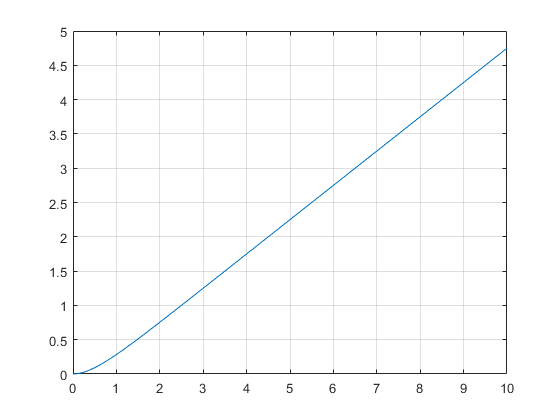

In [3]:
t=0:0.1:10;
y=step(g,t);
plot(t,y)
grid on


## III-1 En boucle fermée

### III-1-1 pour $K=100$


In [4]:
f1=tf([100],[1,2,100])


f1 =
 
        100
  ---------------
  s^2 + 2 s + 100
 
Continuous-time transfer function.




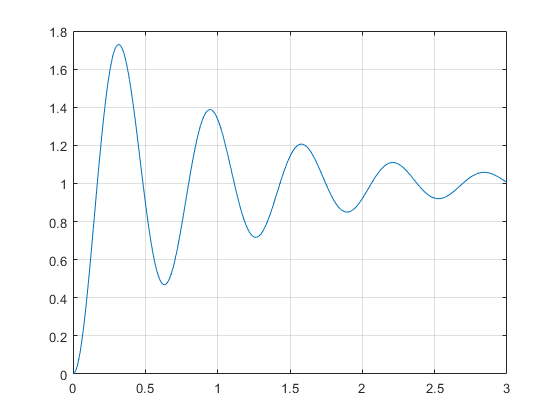

In [5]:
t=0:0.01:3;
y=step(f1,t);
plot(t,y)
grid on

In [6]:
S = stepinfo(f1,'SettlingTimeThreshold',0.05)

S = 
  struct with fields:

        RiseTime: 0.1127
    SettlingTime: 2.8957
     SettlingMin: 0.4685
     SettlingMax: 1.7292
       Overshoot: 72.9156
      Undershoot: 0
            Peak: 1.7292
        PeakTime: 0.3142



Pour $K=100$, la réponse du système en boucle fermée est trés pseudo oscillatoire, cela est dit à la faible conséquent valeur de $\zeta=\frac{1}{10}=0.1$

### III-1-2 Pour K= 2.04


f2 =
 
        2.041
  -----------------
  s^2 + 2 s + 2.041
 
Continuous-time transfer function.




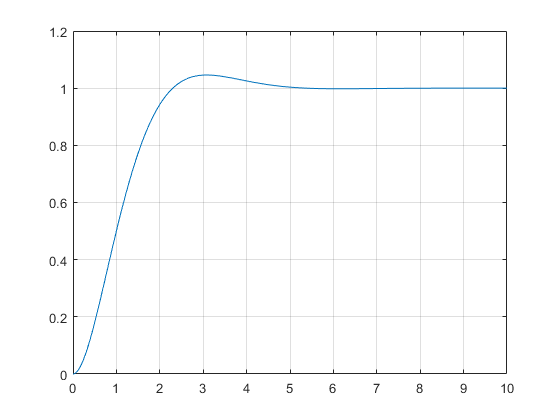

In [7]:
f2=tf([(1/0.7)^2],[1,2,(1/0.7)^2])
t=0:0.01:10;
y=step(f2,t);
plot(t,y)
grid on

In [8]:
S = stepinfo(f2,'SettlingTimeThreshold',0.05)

S = 
  struct with fields:

        RiseTime: 1.4888
    SettlingTime: 2.0300
     SettlingMin: 0.9001
     SettlingMax: 1.0460
       Overshoot: 4.5986
      Undershoot: 0
            Peak: 1.0460
        PeakTime: 3.0855



la contrainte sur le dépassement (overshoot) est bien staisfaite, puisque $4.59 \lt 10$. Cependant on ne garantit pas la contarinte de rapidité: le SettlingTime $2.03$ est supérieur à $0.3$. 

# IV- Conclusion
Avec un correcteur proportionnel, on n'arrive pas à satisfaire à la fois la contrainte sur la rapidité et celle surt le dépassemnt. Ceci nous amener à investiguer d'autres structures de PID comme, le PD, PI,et le PID.